## Enabling GPU

In [ ]:
import numpy as np

In [ ]:
import tensorflow as tf

In [ ]:
!nvidia-smi

Mon May 10 18:42:37 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 465.19.01    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   41C    P8     9W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
!pip install gputil
!pip install psutil
!pip install humanize

In [ ]:
# Import packages
import os,sys,humanize,psutil,GPUtil

# Define function
def mem_report():
  print("CPU RAM Free: " + humanize.naturalsize( psutil.virtual_memory().available ))
  
  GPUs = GPUtil.getGPUs()
  for i, gpu in enumerate(GPUs):
    print('GPU {:d} ... Mem Free: {:.0f}MB / {:.0f}MB | Utilization {:3.0f}%'.format(i, gpu.memoryFree, gpu.memoryTotal, gpu.memoryUtil*100))
    
# Execute function
mem_report()

CPU RAM Free: 12.4 GB
GPU 0 ... Mem Free: 15109MB / 15109MB | Utilization   0%


## Importing Libraries

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, Input, ZeroPadding2D, BatchNormalization, Activation, MaxPooling2D, Flatten, Dense
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.callbacks import TensorBoard, ModelCheckpoint
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.utils import shuffle
import cv2
import imutils
import numpy as np
import matplotlib.pyplot as plt
import time
from os import listdir

%matplotlib inline
import os
from skimage import io

In [ ]:
from google.colab import drive 
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Mode-1

In [ ]:
from zipfile import ZipFile
file_name="/content/drive/MyDrive/Nemash/Dataset/Modes/Mode1.zip"

with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print('Done')
!rm -rf /content/__MACOSX

Done


In [ ]:
indices = np.arange(9000)
np.random.shuffle(indices)

In [ ]:
print(indices)

[1680 7506 5786 ...  318 8391 1853]


In [ ]:
def load_data(dir_list, image_size):
    """
    Read images, resize and normalize them. 
    Arguments:
        dir_list: list of strings representing file directories.
    Returns:
        X: A numpy array with shape = (#_examples, image_width, image_height, #_channels)
        y: A numpy array with shape = (#_examples, 1)
    """

    # load all images in a directory
    X = []
    y = []
    image_width, image_height = image_size
    ini = r'/content/Mode1/'

    for directory in dir_list:
      path= ini+ directory
      l= os.listdir(path)
      count=1
      for i in l: 
         
        img = io.imread(path+ '/' +i, as_gray=True)
        image = cv2.resize(img, dsize=(image_width, image_height), interpolation=cv2.INTER_CUBIC)
        image = image / 255.0
        image = cv2.resize(image, (64, 64))
        X.append(image)
        
        if directory== 'Covid':
          y.append([2])
        elif directory=='Pneumonia':
          y.append([1])
        else:
          y.append([0])


    X = np.array(X)
    y = np.array(y)
    
    
    #print(indices)
    X = X[indices]
    y = y[indices]
    

    print(f'Number of examples is: {len(X)}')
    print(f'X shape is: {X.shape}')
    print(f'y shape is: {y.shape}')
    print(X.shape[0])
    
    return X, y

In [ ]:

import random
class2='Covid'
class1='Pneumonia'
class0='noFindings'

IMG_WIDTH, IMG_HEIGHT = (64, 64)

X1, y1 = load_data([class2,class1,class0], (IMG_WIDTH, IMG_HEIGHT))

Number of examples is: 9000
X shape is: (9000, 64, 64)
y shape is: (9000, 1)
9000


In [ ]:
print(X1.shape)
print(y1.shape)

(9000, 64, 64)
(9000, 1)


In [ ]:
X1 = X1.reshape(X1.shape[0],IMG_WIDTH,IMG_HEIGHT,1)
print(X1.shape)

(9000, 64, 64, 1)


## Mode-2

In [ ]:
from zipfile import ZipFile
file_name="/content/drive/MyDrive/Nemash/Dataset/Modes/Mode2.zip"

with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print('Done')
!rm -rf /content/__MACOSX

Done


In [ ]:
print(indices)

[1680 7506 5786 ...  318 8391 1853]


In [ ]:
def load_data2(dir_list, image_size):
    """
    Read images, resize and normalize them. 
    Arguments:
        dir_list: list of strings representing file directories.
    Returns:
        X: A numpy array with shape = (#_examples, image_width, image_height, #_channels)
        y: A numpy array with shape = (#_examples, 1)
    """

    # load all images in a directory
    X = []
    y = []
    image_width, image_height = image_size
    ini = r'/content/Mode2/'

    for directory in dir_list:
      path= ini+ directory
      l= os.listdir(path)
      count=1
      for i in l: 
         
        img = io.imread(path+ '/' +i, as_gray=True)
        image = cv2.resize(img, dsize=(image_width, image_height), interpolation=cv2.INTER_CUBIC)
        image = image / 255.0
        image = cv2.resize(image, (64, 64))
        X.append(image)
        
        if directory== 'Covid':
          y.append([2])
        elif directory=='Pneumonia':
          y.append([1])
        else:
          y.append([0])


    X = np.array(X)
    y = np.array(y)
    
    
    #print(indices)
    X = X[indices]
    y = y[indices]
    

    print(f'Number of examples is: {len(X)}')
    print(f'X shape is: {X.shape}')
    print(f'y shape is: {y.shape}')
    print(X.shape[0])
    
    return X, y

In [ ]:
import random
class2='Covid'
class1='Pneumonia'
class0='noFindings'

IMG_WIDTH, IMG_HEIGHT = (64, 64)

X2, y2 = load_data2([class2,class1,class0], (IMG_WIDTH, IMG_HEIGHT))

Number of examples is: 9000
X shape is: (9000, 64, 64)
y shape is: (9000, 1)
9000


In [ ]:
print(X2.shape)
print(y2.shape)

(9000, 64, 64)
(9000, 1)


In [ ]:
X2 = X2.reshape(X2.shape[0],IMG_WIDTH,IMG_HEIGHT,1)
print(X2.shape)

(9000, 64, 64, 1)


#Mode-3

In [ ]:
from zipfile import ZipFile
file_name="/content/drive/MyDrive/Nemash/Dataset/Modes/Mode3.zip"

with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print('Done')
!rm -rf /content/__MACOSX

Done


In [ ]:
print(indices)

[1680 7506 5786 ...  318 8391 1853]


In [ ]:
def load_data3(dir_list, image_size):
    """
    Read images, resize and normalize them. 
    Arguments:
        dir_list: list of strings representing file directories.
    Returns:
        X: A numpy array with shape = (#_examples, image_width, image_height, #_channels)
        y: A numpy array with shape = (#_examples, 1)
    """

    # load all images in a directory
    X = []
    y = []
    image_width, image_height = image_size
    ini = r'/content/Mode3/'

    for directory in dir_list:
      path= ini+ directory
      l= os.listdir(path)
      count=1
      for i in l: 
         
        img = io.imread(path+ '/' +i, as_gray=True)
        image = cv2.resize(img, dsize=(image_width, image_height), interpolation=cv2.INTER_CUBIC)
        image = image / 255.0
        image = cv2.resize(image, (64, 64))
        X.append(image)
        
        if directory== 'Covid':
          y.append([2])
        elif directory=='Pneumonia':
          y.append([1])
        else:
          y.append([0])


    X = np.array(X)
    y = np.array(y)
    
    
    #print(indices)
    X = X[indices]
    y = y[indices]
    

    print(f'Number of examples is: {len(X)}')
    print(f'X shape is: {X.shape}')
    print(f'y shape is: {y.shape}')
    print(X.shape[0])
    
    return X, y

In [ ]:
import random
class2='Covid'
class1='Pneumonia'
class0='noFindings'

IMG_WIDTH, IMG_HEIGHT = (64, 64)

X3, y3 = load_data3([class2,class1,class0], (IMG_WIDTH, IMG_HEIGHT))

Number of examples is: 9000
X shape is: (9000, 64, 64)
y shape is: (9000, 1)
9000


In [ ]:
print(X3.shape)
print(y3.shape)

(9000, 64, 64)
(9000, 1)


In [ ]:
X3 = X3.reshape(X3.shape[0],IMG_WIDTH,IMG_HEIGHT,1)
print(X3.shape)

(9000, 64, 64, 1)


#Mode-4


In [ ]:
from zipfile import ZipFile
file_name="/content/drive/MyDrive/Nemash/Dataset/Modes/Mode4.zip"

with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print('Done')
!rm -rf /content/__MACOSX

Done


In [ ]:
def load_data4(dir_list, image_size):
    """
    Read images, resize and normalize them. 
    Arguments:
        dir_list: list of strings representing file directories.
    Returns:
        X: A numpy array with shape = (#_examples, image_width, image_height, #_channels)
        y: A numpy array with shape = (#_examples, 1)
    """

    # load all images in a directory
    X = []
    y = []
    image_width, image_height = image_size
    ini = r'/content/Mode4/'

    for directory in dir_list:
      path= ini+ directory
      l= os.listdir(path)
      count=1
      for i in l: 
         
        img = io.imread(path+ '/' +i, as_gray=True)
        image = cv2.resize(img, dsize=(image_width, image_height), interpolation=cv2.INTER_CUBIC)
        image = image / 255.0
        image = cv2.resize(image, (64, 64))
        X.append(image)
        
        if directory== 'Covid':
          y.append([2])
        elif directory=='Pneumonia':
          y.append([1])
        else:
          y.append([0])


    X = np.array(X)
    y = np.array(y)
    
    
    #print(indices)
    X = X[indices]
    y = y[indices]
    

    print(f'Number of examples is: {len(X)}')
    print(f'X shape is: {X.shape}')
    print(f'y shape is: {y.shape}')
    print(X.shape[0])
    
    return X, y

In [ ]:
import random
class2='Covid'
class1='Pneumonia'
class0='noFindings'

IMG_WIDTH, IMG_HEIGHT = (64, 64)

X4, y4 = load_data4([class2,class1,class0], (IMG_WIDTH, IMG_HEIGHT))

Number of examples is: 9000
X shape is: (9000, 64, 64)
y shape is: (9000, 1)
9000


In [ ]:
print(X4.shape)
print(y4.shape)

(9000, 64, 64)
(9000, 1)


In [ ]:
X4 = X4.reshape(X4.shape[0],IMG_WIDTH,IMG_HEIGHT,1)
print(X4.shape)

(9000, 64, 64, 1)


#Mode-5

In [ ]:
from zipfile import ZipFile
file_name="/content/drive/MyDrive/Nemash/Dataset/Modes/Mode5.zip"

with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print('Done')
!rm -rf /content/__MACOSX

Done


In [ ]:
def load_data5(dir_list, image_size):
    """
    Read images, resize and normalize them. 
    Arguments:
        dir_list: list of strings representing file directories.
    Returns:
        X: A numpy array with shape = (#_examples, image_width, image_height, #_channels)
        y: A numpy array with shape = (#_examples, 1)
    """

    # load all images in a directory
    X = []
    y = []
    image_width, image_height = image_size
    ini = r'/content/Mode5/'

    for directory in dir_list:
      path= ini+ directory
      l= os.listdir(path)
      count=1
      for i in l: 
         
        img = io.imread(path+ '/' +i, as_gray=True)
        image = cv2.resize(img, dsize=(image_width, image_height), interpolation=cv2.INTER_CUBIC)
        image = image / 255.0
        image = cv2.resize(image, (64, 64))
        X.append(image)
        
        if directory== 'Covid':
          y.append([2])
        elif directory=='Pneumonia':
          y.append([1])
        else:
          y.append([0])


    X = np.array(X)
    y = np.array(y)
    
    
    #print(indices)
    X = X[indices]
    y = y[indices]
    

    print(f'Number of examples is: {len(X)}')
    print(f'X shape is: {X.shape}')
    print(f'y shape is: {y.shape}')
    print(X.shape[0])
    
    return X, y

In [ ]:
import random
class2='Covid'
class1='Pneumonia'
class0='noFindings'

IMG_WIDTH, IMG_HEIGHT = (64, 64)

X5, y5 = load_data5([class2,class1,class0], (IMG_WIDTH, IMG_HEIGHT))

Number of examples is: 9000
X shape is: (9000, 64, 64)
y shape is: (9000, 1)
9000


In [ ]:
print(X5.shape)
print(y5.shape)

(9000, 64, 64)
(9000, 1)


In [ ]:
X5 = X5.reshape(X5.shape[0],IMG_WIDTH,IMG_HEIGHT,1)
print(X5.shape)

(9000, 64, 64, 1)


#Mode-6

In [ ]:
from zipfile import ZipFile
file_name="/content/drive/MyDrive/Nemash/Dataset/Modes/Mode6.zip"

with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print('Done')
!rm -rf /content/__MACOSX

Done


In [ ]:
def load_data6(dir_list, image_size):
    """
    Read images, resize and normalize them. 
    Arguments:
        dir_list: list of strings representing file directories.
    Returns:
        X: A numpy array with shape = (#_examples, image_width, image_height, #_channels)
        y: A numpy array with shape = (#_examples, 1)
    """

    # load all images in a directory
    X = []
    y = []
    image_width, image_height = image_size
    ini = r'/content/Mode6/'

    for directory in dir_list:
      path= ini+ directory
      l= os.listdir(path)
      count=1
      for i in l: 
         
        img = io.imread(path+ '/' +i, as_gray=True)
        image = cv2.resize(img, dsize=(image_width, image_height), interpolation=cv2.INTER_CUBIC)
        image = image / 255.0
        image = cv2.resize(image, (64, 64))
        X.append(image)
        
        if directory== 'Covid':
          y.append([2])
        elif directory=='Pneumonia':
          y.append([1])
        else:
          y.append([0])


    X = np.array(X)
    y = np.array(y)
    
    
    #print(indices)
    X = X[indices]
    y = y[indices]
    

    print(f'Number of examples is: {len(X)}')
    print(f'X shape is: {X.shape}')
    print(f'y shape is: {y.shape}')
    print(X.shape[0])
    
    return X, y

In [ ]:
import random
class2='Covid'
class1='Pneumonia'
class0='noFindings'

IMG_WIDTH, IMG_HEIGHT = (64, 64)

X6, y6 = load_data6([class2,class1,class0], (IMG_WIDTH, IMG_HEIGHT))

Number of examples is: 9000
X shape is: (9000, 64, 64)
y shape is: (9000, 1)
9000


In [ ]:
print(X6.shape)
print(y6.shape)

(9000, 64, 64)
(9000, 1)


In [ ]:
X6 = X6.reshape(X6.shape[0],IMG_WIDTH,IMG_HEIGHT,1)
print(X6.shape)

(9000, 64, 64, 1)


#Mode-7

In [ ]:
from zipfile import ZipFile
file_name="/content/drive/MyDrive/Nemash/Dataset/Modes/Mode7.zip"

with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print('Done')
!rm -rf /content/__MACOSX

Done


In [ ]:
def load_data7(dir_list, image_size):
    """
    Read images, resize and normalize them. 
    Arguments:
        dir_list: list of strings representing file directories.
    Returns:
        X: A numpy array with shape = (#_examples, image_width, image_height, #_channels)
        y: A numpy array with shape = (#_examples, 1)
    """

    # load all images in a directory
    X = []
    y = []
    image_width, image_height = image_size
    ini = r'/content/Mode7/'

    for directory in dir_list:
      path= ini+ directory
      l= os.listdir(path)
      count=1
      for i in l: 
         
        img = io.imread(path+ '/' +i, as_gray=True)
        image = cv2.resize(img, dsize=(image_width, image_height), interpolation=cv2.INTER_CUBIC)
        image = image / 255.0
        image = cv2.resize(image, (64, 64))
        X.append(image)
        
        if directory== 'Covid':
          y.append([2])
        elif directory=='Pneumonia':
          y.append([1])
        else:
          y.append([0])


    X = np.array(X)
    y = np.array(y)
    
    
    #print(indices)
    X = X[indices]
    y = y[indices]
    

    print(f'Number of examples is: {len(X)}')
    print(f'X shape is: {X.shape}')
    print(f'y shape is: {y.shape}')
    print(X.shape[0])
    
    return X, y

In [ ]:
import random
class2='Covid'
class1='Pneumonia'
class0='noFindings'

IMG_WIDTH, IMG_HEIGHT = (64, 64)

X7, y7 = load_data7([class2,class1,class0], (IMG_WIDTH, IMG_HEIGHT))

Number of examples is: 9000
X shape is: (9000, 64, 64)
y shape is: (9000, 1)
9000


In [ ]:
print(X7.shape)
print(y7.shape)

(9000, 64, 64)
(9000, 1)


In [ ]:
X7 = X7.reshape(X7.shape[0],IMG_WIDTH,IMG_HEIGHT,1)
print(X7.shape)

(9000, 64, 64, 1)


# Model with cross-validation

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D

from keras import Model 
from keras.layers.core import Dense, Activation
from keras.layers import Conv2D, Conv1D, MaxPooling2D, Reshape, Concatenate, Dropout , MaxPooling1D, Flatten
from keras.layers import Dense, Input
from keras.layers import LSTM, Dense

In [ ]:
  model_2D_1_i = Input((64, 64, 1))
  model_2D_1 = Conv2D(64, kernel_size=(3, 3) , strides=(1,1), activation='relu')(model_2D_1_i)
  model_2D_1 = BatchNormalization()(model_2D_1)
  model_2D_1 = Dropout(0.1)(model_2D_1)
  model_2D_1 = MaxPooling2D(pool_size=(2, 2), strides=(2, 2))(model_2D_1)
  model_2D_1 = Conv2D(32, kernel_size=(3, 3) , strides=(1,1), activation='relu')(model_2D_1)
  model_2D_1 = BatchNormalization()(model_2D_1)
  model_2D_1 = Dropout(0.2)(model_2D_1)
  model_2D_1 = MaxPooling2D(pool_size=(2, 2), strides=(2, 2))(model_2D_1)
  model_2D_1 = Conv2D(16, kernel_size=(3, 3) , strides=(1,1), activation='relu')(model_2D_1)
  model_2D_1 = BatchNormalization()(model_2D_1)
  model_2D_1 = Dropout(0.3)(model_2D_1)
  model_2D_1 = MaxPooling2D(pool_size=(2, 2), strides=(2, 2))(model_2D_1)
  model_2D_1 = Flatten()(model_2D_1)

In [ ]:
  model_2D_2_i = Input((64, 64, 1))
  model_2D_2 = Conv2D(64, kernel_size=(3, 3) , strides=(1,1), activation='relu')(model_2D_2_i)
  model_2D_2 = BatchNormalization()(model_2D_2)
  model_2D_2 = Dropout(0.1)(model_2D_2)
  model_2D_2 = MaxPooling2D(pool_size=(2, 2), strides=(2, 2))(model_2D_2)
  model_2D_2 = Conv2D(32, kernel_size=(3, 3) , strides=(1,1), activation='relu')(model_2D_2)
  model_2D_2 = BatchNormalization()(model_2D_2)
  model_2D_2 = Dropout(0.2)(model_2D_2)
  model_2D_2 = MaxPooling2D(pool_size=(2, 2), strides=(2, 2))(model_2D_2)
  model_2D_2 = Conv2D(16, kernel_size=(3, 3) , strides=(1,1), activation='relu')(model_2D_2)
  model_2D_2 = BatchNormalization()(model_2D_2)
  model_2D_2 = Dropout(0.3)(model_2D_2)
  model_2D_2 = MaxPooling2D(pool_size=(2, 2), strides=(2, 2))(model_2D_2)
  model_2D_2 = Flatten()(model_2D_2)

In [ ]:
  model_2D_3_i = Input((64, 64, 1))
  model_2D_3 = Conv2D(64, kernel_size=(3, 3) , strides=(1,1), activation='relu')(model_2D_3_i)
  model_2D_3 = BatchNormalization()(model_2D_3)
  model_2D_3 = Dropout(0.1)(model_2D_3)
  model_2D_3 = MaxPooling2D(pool_size=(2, 2), strides=(2, 2))(model_2D_3)
  model_2D_3 = Conv2D(32, kernel_size=(3, 3) , strides=(1,1), activation='relu')(model_2D_3)
  model_2D_3 = BatchNormalization()(model_2D_3)
  model_2D_3 = Dropout(0.2)(model_2D_3)
  model_2D_3 = MaxPooling2D(pool_size=(2, 2), strides=(2, 2))(model_2D_3)
  model_2D_3 = Conv2D(16, kernel_size=(3, 3) , strides=(1,1), activation='relu')(model_2D_3)
  model_2D_3 = BatchNormalization()(model_2D_3)
  model_2D_3 = Dropout(0.3)(model_2D_3)
  model_2D_3 = MaxPooling2D(pool_size=(2, 2), strides=(2, 2))(model_2D_3)
  model_2D_3 = Flatten()(model_2D_3)

In [ ]:
  model_2D_4_i = Input((64, 64, 1))
  model_2D_4 = Conv2D(64, kernel_size=(3, 3) , strides=(1,1), activation='relu')(model_2D_4_i)
  model_2D_4 = BatchNormalization()(model_2D_4)
  model_2D_4 = Dropout(0.1)(model_2D_4)
  model_2D_4 = MaxPooling2D(pool_size=(2, 2), strides=(2, 2))(model_2D_4)
  model_2D_4 = Conv2D(32, kernel_size=(3, 3) , strides=(1,1), activation='relu')(model_2D_4)
  model_2D_4 = BatchNormalization()(model_2D_4)
  model_2D_4 = Dropout(0.2)(model_2D_4)
  model_2D_4 = MaxPooling2D(pool_size=(2, 2), strides=(2, 2))(model_2D_4)
  model_2D_4 = Conv2D(16, kernel_size=(3, 3) , strides=(1,1), activation='relu')(model_2D_4)
  model_2D_4 = BatchNormalization()(model_2D_4)
  model_2D_4 = Dropout(0.3)(model_2D_4)
  model_2D_4 = MaxPooling2D(pool_size=(2, 2), strides=(2, 2))(model_2D_4)
  model_2D_4 = Flatten()(model_2D_4)

In [ ]:
  model_2D_5_i = Input((64, 64, 1))
  model_2D_5 = Conv2D(64, kernel_size=(3, 3) , strides=(1,1), activation='relu')(model_2D_5_i)
  model_2D_5 = BatchNormalization()(model_2D_5)
  model_2D_5 = Dropout(0.1)(model_2D_5)
  model_2D_5 = MaxPooling2D(pool_size=(2, 2), strides=(2, 2))(model_2D_5)
  model_2D_5 = Conv2D(32, kernel_size=(3, 3) , strides=(1,1), activation='relu')(model_2D_5)
  model_2D_5 = BatchNormalization()(model_2D_5)
  model_2D_5 = Dropout(0.2)(model_2D_5)
  model_2D_5 = MaxPooling2D(pool_size=(2, 2), strides=(2, 2))(model_2D_5)
  model_2D_5 = Conv2D(16, kernel_size=(3, 3) , strides=(1,1), activation='relu')(model_2D_5)
  model_2D_5 = BatchNormalization()(model_2D_5)
  model_2D_5 = Dropout(0.3)(model_2D_5)
  model_2D_5 = MaxPooling2D(pool_size=(2, 2), strides=(2, 2))(model_2D_5)
  model_2D_5 = Flatten()(model_2D_5)

In [ ]:
  model_2D_6_i = Input((64, 64, 1))
  model_2D_6 = Conv2D(64, kernel_size=(3, 3) , strides=(1,1), activation='relu')(model_2D_6_i)
  model_2D_6 = BatchNormalization()(model_2D_6)
  model_2D_6 = Dropout(0.1)(model_2D_6)
  model_2D_6 = MaxPooling2D(pool_size=(2, 2), strides=(2, 2))(model_2D_6)
  model_2D_6 = Conv2D(32, kernel_size=(3, 3) , strides=(1,1), activation='relu')(model_2D_6)
  model_2D_6 = BatchNormalization()(model_2D_6)
  model_2D_6 = Dropout(0.2)(model_2D_6)
  model_2D_6 = MaxPooling2D(pool_size=(2, 2), strides=(2, 2))(model_2D_6)
  model_2D_6 = Conv2D(16, kernel_size=(3, 3) , strides=(1,1), activation='relu')(model_2D_6)
  model_2D_6 = BatchNormalization()(model_2D_6)
  model_2D_6 = Dropout(0.3)(model_2D_6)
  model_2D_6 = MaxPooling2D(pool_size=(2, 2), strides=(2, 2))(model_2D_6)
  model_2D_6 = Flatten()(model_2D_6)

In [ ]:
  model_2D_7_i = Input((64, 64, 1))
  model_2D_7 = Conv2D(64, kernel_size=(3, 3) , strides=(1,1), activation='relu')(model_2D_7_i)
  model_2D_7 = BatchNormalization()(model_2D_7)
  model_2D_7 = Dropout(0.1)(model_2D_7)
  model_2D_7 = MaxPooling2D(pool_size=(2, 2), strides=(2, 2))(model_2D_7)
  model_2D_7 = Conv2D(32, kernel_size=(3, 3) , strides=(1,1), activation='relu')(model_2D_7)
  model_2D_7 = BatchNormalization()(model_2D_7)
  model_2D_7 = Dropout(0.2)(model_2D_7)
  model_2D_7 = MaxPooling2D(pool_size=(2, 2), strides=(2, 2))(model_2D_7)
  model_2D_7 = Conv2D(16, kernel_size=(3, 3) , strides=(1,1), activation='relu')(model_2D_7)
  model_2D_7 = BatchNormalization()(model_2D_7)
  model_2D_7 = Dropout(0.3)(model_2D_7)
  model_2D_7 = MaxPooling2D(pool_size=(2, 2), strides=(2, 2))(model_2D_7)
  model_2D_7 = Flatten()(model_2D_7)

In [ ]:
merged = Concatenate()([model_2D_4, model_2D_5, model_2D_6, model_2D_7])
dense1 = Dense(200, activation='relu')(merged)
dense2 = Dense(20, activation='relu')(dense1)
outputs = Dense(3, activation='softmax')(dense2)
model = Model(inputs=[model_2D_4_i, model_2D_5_i, model_2D_6_i, model_2D_7_i], outputs=outputs)

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 64, 64, 1)]  0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, 64, 64, 1)]  0                                            
__________________________________________________________________________________________________
input_3 (InputLayer)            [(None, 64, 64, 1)]  0                                            
__________________________________________________________________________________________________
input_4 (InputLayer)            [(None, 64, 64, 1)]  0                                            
______________________________________________________________________________________________

In [ ]:
import pandas as pd
import os
import numpy as np
from sklearn import metrics
from scipy.stats import zscore
from sklearn.model_selection import KFold
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from matplotlib import pyplot
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
fold = 1

 
def get_score(model, X_train1, X_test1, y_train1, y_test1, X_train2, X_test2, y_train2, y_test2,  X_train3, X_test3, y_train3, y_test3, X_train4, X_test4, y_train4, y_test4, X_train5, X_test5, y_train5, y_test5, X_train6, X_test6, y_train6, y_test6, X_train7, X_test7, y_train7, y_test7):
 
 print("Fold number-", fold)

 
 history = model.fit([X_train1, X_train2, X_train3, X_train4, X_train5, X_train6, X_train7], y_train1,validation_split=0.25, batch_size=64, epochs=25)
 
 #return model.score(X_test, y_test)
 train_loss, train_accuracy = model.evaluate([X_train1, X_train2, X_train3, X_train4, X_train5, X_train6, X_train7], y_train1, verbose=0)
 
 test_loss, test_accuracy = model.evaluate([X_test1, X_test2, X_test3, X_test4, X_test5, X_test6, X_test7], y_test1, verbose=0)

 predictions= []
 pred = model.predict([X_test1, X_test2, X_test3, X_test4, X_test5, X_test6, X_test7])
 for i in range(3000): 
  value = [np.argmax(pred[i])]
  predictions.append(value)
 predictions = np.array(predictions)

 #score = np.sqrt(metrics.mean_squared_error(predictions,y_test1))
 #print(f"Fold score (RMSE): {score}")

 #precision = precision_score(y_test1, predictions, average='micro')
 #print("Fold precision: ", precision)
 
 #recall = recall_score(y_test1, predictions, average='micro')
 #print("Fold recall", recall)

 #score = f1_score(y_test1, predictions, average='micro')
 #print('Fold F-Measure: %.3f' % score)

 print(metrics.classification_report(y_test1, predictions, digits=3))


 print(metrics.confusion_matrix(y_test1, predictions))

 loss_train = np.array(history.history['accuracy'])
 loss_val = np.array(history.history['val_accuracy'])
 ran = loss_train.shape[0]
 epochs = range(1,ran + 1)
 plt.plot(epochs, loss_train, 'g', label='Training accuracy')
 plt.plot(epochs, loss_val, 'b', label='validation accuracy')
 plt.title('Training and Validation accuracy')
 plt.xlabel('Epochs')
 plt.ylabel('Accuracy')
 #plt.xlim(1, 70)
 plt.ylim(0, 1.1)
 plt.legend()
 plt.show()
 
 
 return train_accuracy, test_accuracy

In [ ]:
import time

Fold number- 1
Epoch 1/50
85/85 [==============================] - 48s 152ms/step - loss: 0.9744 - accuracy: 0.6520 - val_loss: 4.2035 - val_accuracy: 0.3567
Epoch 2/50
85/85 [==============================] - 11s 135ms/step - loss: 0.1939 - accuracy: 0.9248 - val_loss: 1.3014 - val_accuracy: 0.6561
Epoch 3/50
85/85 [==============================] - 11s 134ms/step - loss: 0.1184 - accuracy: 0.9540 - val_loss: 1.5482 - val_accuracy: 0.3367
Epoch 4/50
85/85 [==============================] - 11s 135ms/step - loss: 0.1038 - accuracy: 0.9622 - val_loss: 0.8152 - val_accuracy: 0.5122
Epoch 5/50
85/85 [==============================] - 11s 134ms/step - loss: 0.0760 - accuracy: 0.9703 - val_loss: 1.2542 - val_accuracy: 0.4833
Epoch 6/50
85/85 [==============================] - 11s 134ms/step - loss: 0.0569 - accuracy: 0.9781 - val_loss: 1.5922 - val_accuracy: 0.4961
Epoch 7/50
85/85 [==============================] - 11s 135ms/step - loss: 0.0390 - accuracy: 0.9853 - val_loss: 0.2265 - val_a

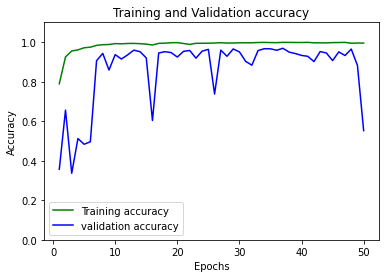

Fold number- 2
Epoch 1/50
85/85 [==============================] - 12s 137ms/step - loss: 0.0595 - accuracy: 0.9839 - val_loss: 0.2435 - val_accuracy: 0.9383
Epoch 2/50
85/85 [==============================] - 12s 137ms/step - loss: 0.0238 - accuracy: 0.9922 - val_loss: 0.1159 - val_accuracy: 0.9633
Epoch 3/50
85/85 [==============================] - 12s 137ms/step - loss: 0.0154 - accuracy: 0.9939 - val_loss: 0.2349 - val_accuracy: 0.9250
Epoch 4/50
85/85 [==============================] - 12s 137ms/step - loss: 0.0112 - accuracy: 0.9965 - val_loss: 0.0897 - val_accuracy: 0.9728
Epoch 5/50
85/85 [==============================] - 12s 137ms/step - loss: 0.0083 - accuracy: 0.9969 - val_loss: 0.1257 - val_accuracy: 0.9661
Epoch 6/50
85/85 [==============================] - 12s 136ms/step - loss: 0.0053 - accuracy: 0.9985 - val_loss: 0.2011 - val_accuracy: 0.9578
Epoch 7/50
85/85 [==============================] - 12s 137ms/step - loss: 0.0049 - accuracy: 0.9978 - val_loss: 0.1128 - val_a

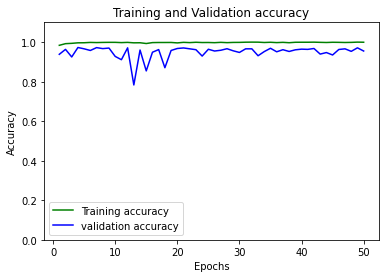

Fold number- 3
Epoch 1/50
85/85 [==============================] - 12s 137ms/step - loss: 0.0371 - accuracy: 0.9900 - val_loss: 1.7422 - val_accuracy: 0.7644
Epoch 2/50
85/85 [==============================] - 12s 137ms/step - loss: 0.0178 - accuracy: 0.9939 - val_loss: 0.4372 - val_accuracy: 0.9061
Epoch 3/50
85/85 [==============================] - 12s 136ms/step - loss: 0.0093 - accuracy: 0.9963 - val_loss: 0.2145 - val_accuracy: 0.9461
Epoch 4/50
85/85 [==============================] - 11s 135ms/step - loss: 0.0022 - accuracy: 0.9994 - val_loss: 0.1370 - val_accuracy: 0.9694
Epoch 5/50
85/85 [==============================] - 12s 136ms/step - loss: 0.0018 - accuracy: 0.9998 - val_loss: 0.1901 - val_accuracy: 0.9539
Epoch 6/50
85/85 [==============================] - 12s 136ms/step - loss: 0.0051 - accuracy: 0.9985 - val_loss: 0.9371 - val_accuracy: 0.9089
Epoch 7/50
85/85 [==============================] - 12s 136ms/step - loss: 0.0057 - accuracy: 0.9978 - val_loss: 0.2581 - val_a

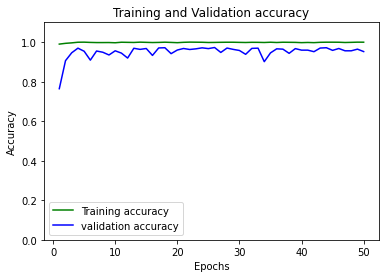

Fold number- 4
Epoch 1/50
85/85 [==============================] - 12s 138ms/step - loss: 0.0056 - accuracy: 0.9983 - val_loss: 0.3603 - val_accuracy: 0.9417
Epoch 2/50
85/85 [==============================] - 12s 136ms/step - loss: 0.0042 - accuracy: 0.9991 - val_loss: 0.2029 - val_accuracy: 0.9700
Epoch 3/50
85/85 [==============================] - 12s 136ms/step - loss: 0.0112 - accuracy: 0.9963 - val_loss: 0.8471 - val_accuracy: 0.8911
Epoch 4/50
85/85 [==============================] - 12s 136ms/step - loss: 0.0127 - accuracy: 0.9967 - val_loss: 0.4539 - val_accuracy: 0.9278
Epoch 5/50
85/85 [==============================] - 12s 137ms/step - loss: 0.0075 - accuracy: 0.9970 - val_loss: 0.2574 - val_accuracy: 0.9428
Epoch 6/50
85/85 [==============================] - 12s 135ms/step - loss: 0.0034 - accuracy: 0.9987 - val_loss: 0.2640 - val_accuracy: 0.9517
Epoch 7/50
85/85 [==============================] - 12s 136ms/step - loss: 0.0026 - accuracy: 0.9991 - val_loss: 0.2506 - val_a

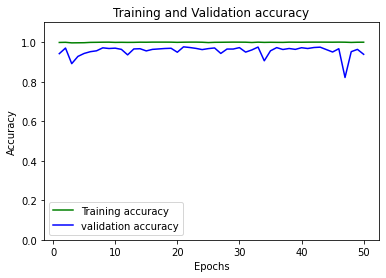

Fold number- 5
Epoch 1/50
85/85 [==============================] - 12s 137ms/step - loss: 0.0057 - accuracy: 0.9983 - val_loss: 0.0560 - val_accuracy: 0.9878
Epoch 2/50
85/85 [==============================] - 11s 135ms/step - loss: 0.0199 - accuracy: 0.9952 - val_loss: 0.1712 - val_accuracy: 0.9728
Epoch 3/50
85/85 [==============================] - 11s 135ms/step - loss: 0.0035 - accuracy: 0.9991 - val_loss: 0.0819 - val_accuracy: 0.9861
Epoch 4/50
85/85 [==============================] - 11s 135ms/step - loss: 0.0038 - accuracy: 0.9987 - val_loss: 0.0231 - val_accuracy: 0.9928
Epoch 5/50
85/85 [==============================] - 11s 135ms/step - loss: 0.0020 - accuracy: 0.9991 - val_loss: 0.0518 - val_accuracy: 0.9922
Epoch 6/50
85/85 [==============================] - 11s 135ms/step - loss: 0.0043 - accuracy: 0.9981 - val_loss: 0.0363 - val_accuracy: 0.9906
Epoch 7/50
85/85 [==============================] - 11s 135ms/step - loss: 4.4208e-04 - accuracy: 1.0000 - val_loss: 0.0418 - v

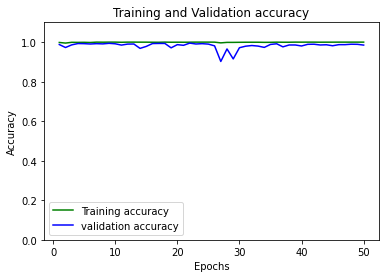

Total runtime of the program is 2966.5161979198456


In [ ]:
fold = 1
from sklearn.model_selection import StratifiedKFold
 
folds = StratifiedKFold(n_splits=5)
 
scores_model_test = []
 
scores_model_train = []
 
begin = time.time()
for train_index, test_index in folds.split(X1,y1):

 X_train1, X_test1, y_train1, y_test1 = X1[train_index], X1[test_index], y1[train_index], y1[test_index]
 
 X_train2, X_test2, y_train2, y_test2 = X2[train_index], X2[test_index], y2[train_index], y2[test_index]

 X_train3, X_test3, y_train3, y_test3 = X3[train_index], X3[test_index], y3[train_index], y3[test_index]

 X_train4, X_test4, y_train4, y_test4 = X4[train_index], X4[test_index], y4[train_index], y4[test_index]

 X_train5, X_test5, y_train5, y_test5 = X5[train_index], X5[test_index], y5[train_index], y5[test_index]

 X_train6, X_test6, y_train6, y_test6 = X6[train_index], X6[test_index], y6[train_index], y6[test_index]

 X_train7, X_test7, y_train7, y_test7 = X7[train_index], X6[test_index], y6[train_index], y6[test_index]
 
 
 tracc, tacc = get_score( model,X_train1, X_test1, y_train1, y_test1, X_train2, X_test2, y_train2, y_test2, X_train3, X_test3, y_train3, y_test3,  X_train4, X_test4, y_train4, y_test4, X_train5, X_test5, y_train5, y_test5, X_train6, X_test6, y_train6, y_test6, X_train7, X_test7, y_train7, y_test7)
 
 scores_model_test.append(tacc)
 
 scores_model_train.append(tracc)
 
 fold = fold + 1

time.sleep(1)
end = time.time()
print(f"Total runtime of the program is {end - begin}")

In [ ]:
print("Training score:")
 
sum_train = 0 
 
for i in range(5):
 print(scores_model_train[i])
 sum_train += scores_model_train[i]
 
print("\nAverage training score:", sum_train/5)
 
print("\nTesting score:")
 
sum_test = 0 
 
for i in range(5):
 print(scores_model_test[i])
 sum_test += scores_model_test[i]
 
print("\nAverage testing score:", sum_test/5)

Training score:
0.5459722280502319
0.9795833230018616
0.9788888692855835
0.9688888788223267
0.9950000047683716

Average training score: 0.893666660785675

Testing score:
0.4861111044883728
0.9738888740539551
0.9811111092567444
0.9372222423553467
0.9655555486679077

Average testing score: 0.8687777757644654
